In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('census_chicago.csv')
df.head()


,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [378]:
west_side = ['West Town', 'Near West Side', 'Lower West Side', 'Humboldt park', 'East Garfield Park', 'West Garfield Park', 'North Lawndale', 'South Lawndale', 'Austin']
north_side = ['Rogers Park','West Ridge','Uptown','Lincoln Square','Edison Park','Norwood Park','Jefferson Park','Forest Glen','North Park','Albany Park',"O'Hare",'Edgewater','North Center','Lake View','Lincoln Park','Avondale','Logan Square','Portage Park','Irving Park','Dunning','Montclaire','Belmont Cragin','Hermosa','Near North Side']
df['Side'] = ['West' if x in west_side else 'North' if x in north_side else 'South' for x in df['COMMUNITY AREA NAME']] 

In [379]:
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,North
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,North
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,North
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,North
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,North
...,...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,South
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,South
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,North
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,North


Text(0.5, 0, 'Side of the Chicago')

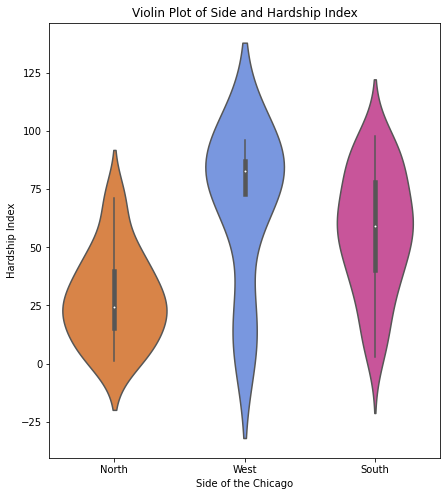

In [380]:
plt.figure(figsize=(7,8))
colors_list = ['#F08030', '#6890F0','#db429e']
ax = sns.violinplot(x="Side", y="HARDSHIP INDEX", data=df, palette=colors_list)
ax.set_xticklabels(['North','West','South'])
ax.set_title("Violin Plot of Side and Hardship Index")
ax.set_ylabel("Hardship Index")
ax.set_xlabel("Side of the Chicago")

Text(0.5, 0, 'Side of the Chicago')

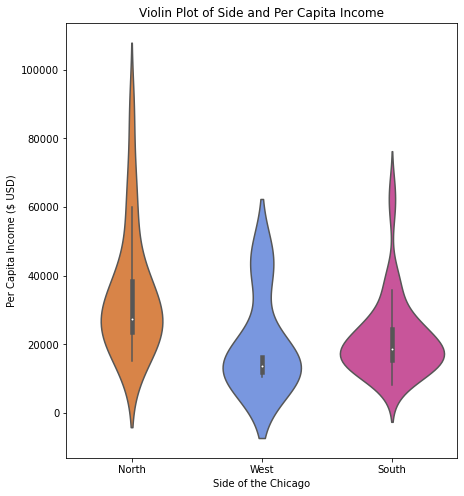

In [381]:
plt.figure(figsize=(7,8))
colors_list = ['#F08030', '#6890F0','#db429e']
ax = sns.violinplot(x="Side", y="PER CAPITA INCOME ", data=df, palette=colors_list)
ax.set_xticklabels(['North','West','South'])
ax.set_title("Violin Plot of Side and Per Capita Income")
ax.set_ylabel("Per Capita Income ($ USD)")
ax.set_xlabel("Side of the Chicago")

In [382]:
df.columns.values

array(['Community Area Number', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Side'], dtype=object)

In [383]:

features = ['PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

<AxesSubplot:>

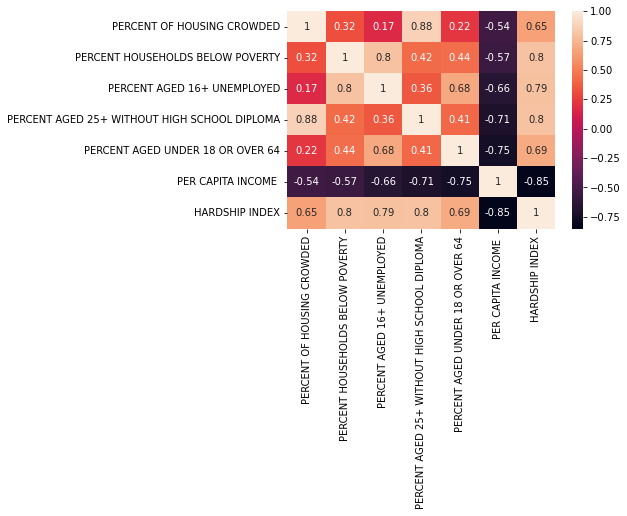

In [384]:
sns.heatmap(df[features].corr(), annot=True)

# corr = train_df.corr(numeric_only=True)
# corr = corr.stack()
# corr = corr.reset_index()
# corr.columns = ['feature1', 'feature2', 'r']
# corr = corr[corr.feature1 != corr.feature2]
# corr

In [385]:
sample = df.sample(frac=1, random_state= 3).reset_index(drop=True)
sample['Side'].iloc[:10].value_counts()
train_df = sample.iloc[10:]
test_df = sample.iloc[:10]
sample['Side'].value_counts()

South    45
North    24
West      9
Name: Side, dtype: int64

In [386]:
from sklearn import neighbors, tree, metrics, model_selection
model = model = tree.DecisionTreeClassifier(min_samples_leaf=12)
xval = model_selection.KFold(8, shuffle=True)
scorer = metrics.make_scorer(metrics.cohen_kappa_score)
train_df = train_df.dropna()
result = model_selection.cross_validate(model, train_df[features], train_df['Side'],cv=xval, scoring=scorer, return_train_score= True)
print('Kappa:', round(result['test_score'].mean(),3))
print('Kappa SD:', round(result['test_score'].std(),3))
print('Train Kappa:', round(result['train_score'].mean(),3))

# print('Kappa SD:', result['test_score'].std())
# print('Train Kappa:', result['train_score'].mean())


Kappa: 0.248
Kappa SD: 0.191
Train Kappa: 0.537


In [387]:
from sklearn import feature_selection
model = tree.DecisionTreeClassifier(min_samples_leaf=12)
xval = model_selection.KFold(4, shuffle=True)
scorer = metrics.make_scorer(metrics.cohen_kappa_score)
fs = feature_selection.SequentialFeatureSelector(model, direction='backward',
    n_features_to_select = 4, scoring=scorer, cv=xval)
fs.fit(train_df[features], train_df['Side'])


SequentialFeatureSelector(cv=KFold(n_splits=4, random_state=None, shuffle=True),
                          direction='backward',
                          estimator=DecisionTreeClassifier(min_samples_leaf=12),
                          n_features_to_select=4,
                          scoring=make_scorer(cohen_kappa_score))

In [388]:
train_X = fs.transform(train_df[features])
train_X.shape

test_X = fs.transform(test_df[features])
test_X.shape

model.fit(train_X, train_df['Side'])
preds = model.predict(test_X)
print('FS kappa:', metrics.cohen_kappa_score(test_df['Side'], preds))

model.fit(train_df[features], train_df['Side'])
preds = model.predict(test_df[features])
print('No FS kappa:', metrics.cohen_kappa_score(test_df['Side'], preds))

FS kappa: 0.19999999999999996
No FS kappa: 0.19999999999999996


In [389]:
from sklearn import pipeline
pipe = pipeline.Pipeline([
    ('fs', feature_selection.SequentialFeatureSelector(model, n_features_to_select=6,
        direction='backward', scoring=scorer, cv=xval)),
    ('model', model)
])
result = model_selection.cross_validate(pipe, df[features], df['Side'],
    cv=xval, scoring=scorer)
print('Kappa:', result['test_score'].mean())

Kappa: nan


/Users/aisaiahpellecer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/aisaiahpellecer/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/aisaiahpellecer/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/aisaiahpellecer/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/aisaiahpellecer/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/aisaiahpellecer/opt/anaconda3/lib/pyt

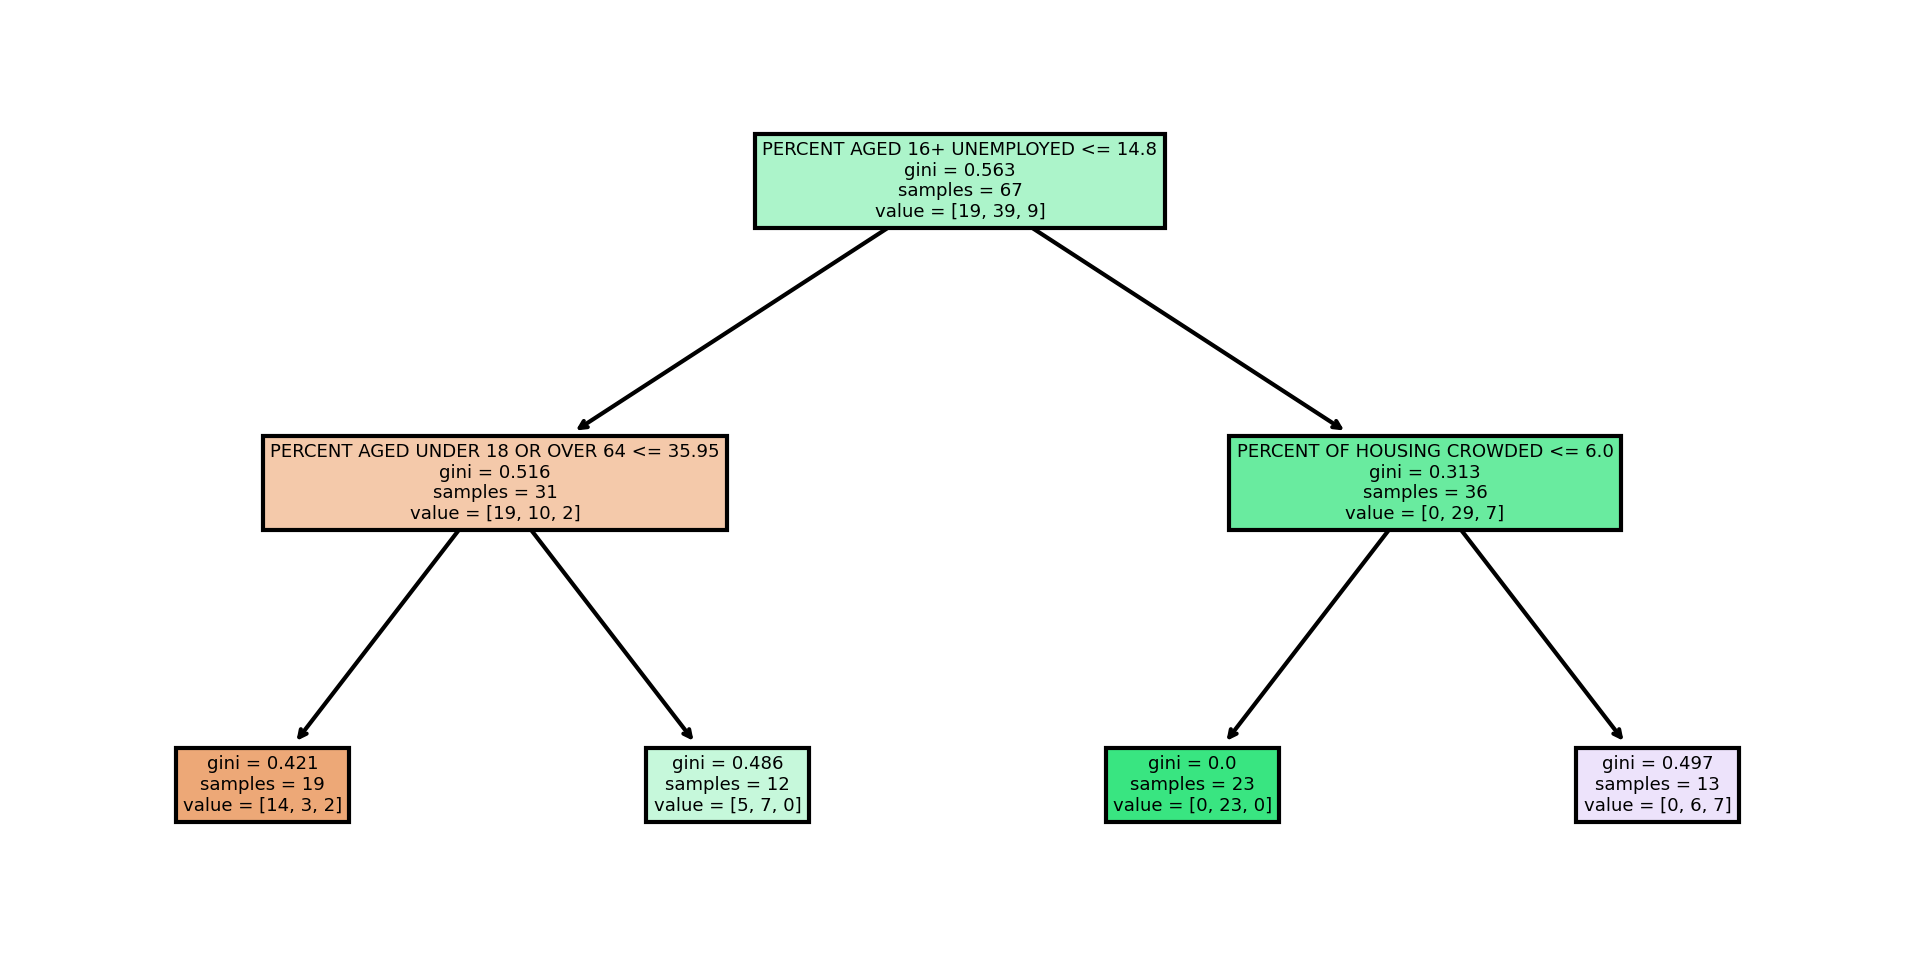

In [390]:
from sklearn import tree

model = tree.DecisionTreeClassifier(min_samples_leaf=12)
model.fit(train_df[features], train_df['Side'])
plt.figure(dpi=300, figsize=(8, 4))
_ = tree.plot_tree(model, feature_names=features, filled=True)

In [391]:
features

['PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [392]:
group1 = df[(df['PERCENT AGED 16+ UNEMPLOYED'] <= 14.8)&(df['PERCENT AGED UNDER 18 OR OVER 64'] <= 35.95)]
group2 = df[(df['PERCENT AGED 16+ UNEMPLOYED'] <= 14.8)&(df['PERCENT AGED UNDER 18 OR OVER 64'] > 35.95)]
group3 = df[(df['PERCENT AGED 16+ UNEMPLOYED'] > 14.8)&(df['PERCENT OF HOUSING CROWDED'] <= 6)]
group4 = df[(df['PERCENT AGED 16+ UNEMPLOYED'] > 14.8)&(df['PERCENT OF HOUSING CROWDED'] > 6)]


In [393]:
a = group1['COMMUNITY AREA NAME'].values.tolist()
b = group2['COMMUNITY AREA NAME'].values.tolist()
c = group3['COMMUNITY AREA NAME'].values.tolist()
d = group4['COMMUNITY AREA NAME'].values.tolist()

In [394]:
# df['group'] = ['A' if x in a else 'B' if x in b else 'C' if x in c else 'D' for x in df['COMMUNITY AREA NAME']] 
for x in df['COMMUNITY AREA NAME']:
    if x in a:
        df.loc[df['COMMUNITY AREA NAME'] == x, 'group'] = 'A'
    elif x in b:
        df.loc[df['COMMUNITY AREA NAME'] == x, 'group'] = 'B'
    elif x in c:
        df.loc[df['COMMUNITY AREA NAME'] == x, 'group'] = 'C'
    elif x in d:
        df.loc[df['COMMUNITY AREA NAME'] == x, 'group'] = 'D'
    else:
        df.loc[df['COMMUNITY AREA NAME'] == x, 'group'] = 'missing'

len(df[df['group'] == 'C'])

24

In [395]:
display(group4)

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side
22,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,West
24,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,West
25,26.0,West Garfield Park,9.4,41.7,25.8,24.5,43.6,10934,92.0,West
26,27.0,East Garfield Park,8.2,42.4,19.6,21.3,43.2,12961,83.0,West
28,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,West
29,30.0,South Lawndale,15.2,30.7,15.8,54.8,33.8,10402,96.0,West
30,31.0,Lower West Side,9.6,25.8,15.8,40.7,32.6,16444,76.0,West
46,47.0,Burnside,6.8,33.0,18.6,19.3,42.7,12515,79.0,South
56,57.0,Archer Heights,8.5,14.1,16.5,35.9,39.2,16134,67.0,South
60,61.0,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0,South


In [396]:
df[df['group']=='D']

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side,group
22,23.0,Humboldt park,14.8,33.9,17.3,35.4,38.0,13781,85.0,West,D
24,25.0,Austin,6.3,28.6,22.6,24.4,37.9,15957,73.0,West,D
25,26.0,West Garfield Park,9.4,41.7,25.8,24.5,43.6,10934,92.0,West,D
26,27.0,East Garfield Park,8.2,42.4,19.6,21.3,43.2,12961,83.0,West,D
28,29.0,North Lawndale,7.4,43.1,21.2,27.6,42.7,12034,87.0,West,D
29,30.0,South Lawndale,15.2,30.7,15.8,54.8,33.8,10402,96.0,West,D
30,31.0,Lower West Side,9.6,25.8,15.8,40.7,32.6,16444,76.0,West,D
46,47.0,Burnside,6.8,33.0,18.6,19.3,42.7,12515,79.0,South,D
56,57.0,Archer Heights,8.5,14.1,16.5,35.9,39.2,16134,67.0,South,D
60,61.0,New City,11.9,29.0,23.0,41.5,38.9,12765,91.0,South,D


In [397]:
len(group1+group2+group3+group4)

78

In [398]:
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side,group
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,North,A
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,North,B
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,North,A
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,North,A
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,North,A
...,...,...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,South,B
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,South,C
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,North,A
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0,North,A


Text(0.5, 0, 'Decision Tree Group ')

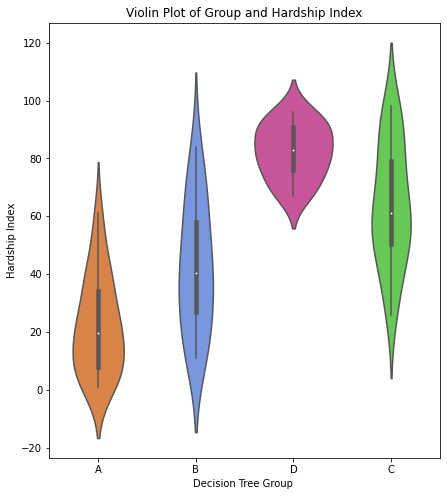

In [399]:
plt.figure(figsize=(7,8))
colors_list = ['#F08030', '#6890F0','#db429e','#59db42']
ax = sns.violinplot(x="group", y="HARDSHIP INDEX", data=df, palette=colors_list)
# ax.set_xticklabels(['A','West','South'])
ax.set_title("Violin Plot of Group and Hardship Index")
ax.set_ylabel("Hardship Index")
ax.set_xlabel("Decision Tree Group ")

Text(0.5, 0, 'Decision Tree Group ')

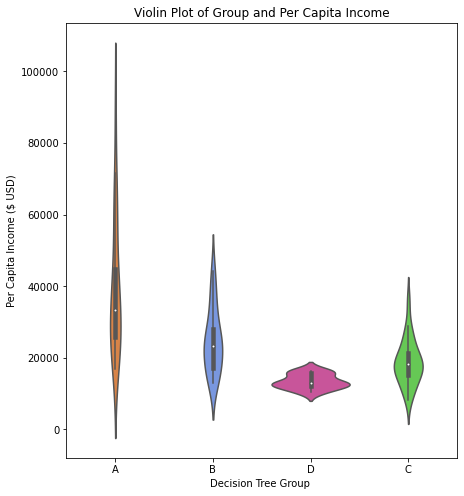

In [400]:
plt.figure(figsize=(7,8))
colors_list = ['#F08030', '#6890F0','#db429e','#59db42']
ax = sns.violinplot(x="group", y="PER CAPITA INCOME ", data=df, palette=colors_list)
# ax.set_xticklabels(['A','West','South'])
ax.set_title("Violin Plot of Group and Per Capita Income")
ax.set_ylabel("Per Capita Income ($ USD)")
ax.set_xlabel("Decision Tree Group ")

In [401]:
# from sklearn import tree, ensemble

# model = ensemble.RandomForestClassifier(min_samples_leaf=11)
# model.fit(train_df[features], train_df['Side'])
# plt.figure(dpi=300, figsize=(8, 4))
# _ = tree.plot_tree(model, feature_names=features, filled=True)

In [402]:
import pandas as pd
from sklearn import tree, metrics, model_selection
import numpy as np
# Read in dataset

# Create cross-validation object
xval = model_selection.KFold(5, shuffle=True)
features = features

# Create results lists
fold_predictions = []
fold_acc = []
df = df.dropna()
# Iterate over cross-validation folds
for train_i, test_i in xval.split(df):
    # Select data for this fold
    train_df = df.iloc[train_i]
    test_df = df.iloc[test_i]
    # Train model, test, and store results for this fold
    model = tree.DecisionTreeClassifier(min_samples_leaf=5)
    train_X = train_df[features]
    train_Y = train_df['Side']
    test_X = test_df[features]
    test_Y = test_df['Side']
    model.fit(train_X,train_Y)
    predictions = model.predict(test_X)
    kappa = metrics.cohen_kappa_score(test_Y,predictions) 
    fold_acc.append(kappa)
    fold_predictions.append(predictions)
    
# Aggregate accuracy; see np.mean and np.std functions for help
acc_mean = np.mean(fold_acc)
acc_sd = np.std(fold_acc)
print(acc_mean)
print(acc_sd)



0.3676697742700986
0.2617514562352188


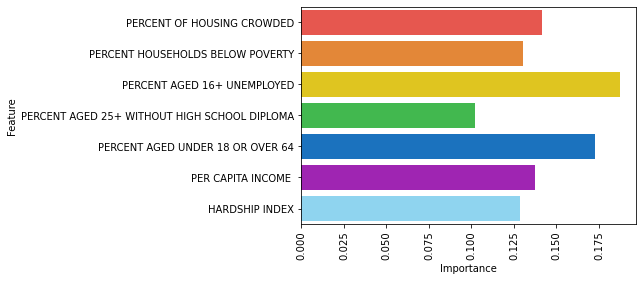

In [403]:
# create a random forest classifier
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()

# fit the classifier on your data
clf.fit(train_df[features], train_df['Side'])

# create a bar chart of feature importance
# plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
# plt.xticks(range(len(clf.feature_importances_)), features, rotation=90)
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.show()
colors_list = ['#FF4136', '#FF851B', '#FFDC00', '#2ECC40', '#0074D9', '#B10DC9', '#7FDBFF']



sns.barplot(x=clf.feature_importances_, y=features, palette= colors_list )
plt.xticks(rotation=90)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [404]:
df[df['group']=='C']['Community Area Number'].values

array([34., 35., 36., 37., 38., 39., 40., 42., 43., 44., 45., 46., 48.,
       49., 50., 51., 53., 54., 67., 68., 69., 71., 73., 75.])

In [405]:
import geopandas

In [406]:
gdf = geopandas.read_file("/Users/aisaiahpellecer/Downloads/boundaries.geojson")

gdf

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


<AxesSubplot:>

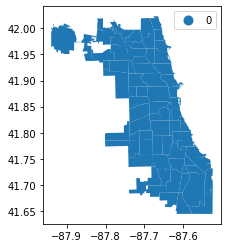

In [407]:
gdf.plot("area", legend=True)


In [408]:
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side,group
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,North,A
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,North,B
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,North,A
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,North,A
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,North,A
...,...,...,...,...,...,...,...,...,...,...,...
72,73.0,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,South,C
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,South,B
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,South,C
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,North,A


In [409]:
df['COMMUNITY AREA NAME'] = df['COMMUNITY AREA NAME'].str.upper()


/var/folders/zv/n7l2w09n51l8qszs6rj9vnp00000gn/T/ipykernel_81971/3609193307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COMMUNITY AREA NAME'] = df['COMMUNITY AREA NAME'].str.upper()


In [410]:
df

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX,Side,group
0,1.0,ROGERS PARK,7.7,23.6,8.7,18.2,27.5,23939,39.0,North,A
1,2.0,WEST RIDGE,7.8,17.2,8.8,20.8,38.5,23040,46.0,North,B
2,3.0,UPTOWN,3.8,24.0,8.9,11.8,22.2,35787,20.0,North,A
3,4.0,LINCOLN SQUARE,3.4,10.9,8.2,13.4,25.5,37524,17.0,North,A
4,5.0,NORTH CENTER,0.3,7.5,5.2,4.5,26.2,57123,6.0,North,A
...,...,...,...,...,...,...,...,...,...,...,...
72,73.0,WASHINGTON HEIGHT,1.1,16.9,20.8,13.7,42.6,19713,48.0,South,C
73,74.0,MOUNT GREENWOOD,1.0,3.4,8.7,4.3,36.8,34381,16.0,South,B
74,75.0,MORGAN PARK,0.8,13.2,15.0,10.8,40.3,27149,30.0,South,C
75,76.0,O'HARE,3.6,15.4,7.1,10.9,30.3,25828,24.0,North,A


In [411]:
subset = df[['COMMUNITY AREA NAME','Side','group']].copy()

In [412]:
# Assuming df is your DataFrame
subset.rename(columns={'COMMUNITY AREA NAME': 'community'}, inplace=True)
subset

,community,Side,group
0,ROGERS PARK,North,A
1,WEST RIDGE,North,B
2,UPTOWN,North,A
3,LINCOLN SQUARE,North,A
4,NORTH CENTER,North,A
...,...,...,...
72,WASHINGTON HEIGHT,South,C
73,MOUNT GREENWOOD,South,B
74,MORGAN PARK,South,C
75,O'HARE,North,A


In [465]:
chicago = gdf.merge(subset, on='community', how='left')

In [466]:
chicago

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,Side,group
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",South,C
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...",South,C
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...",South,C
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...",South,C
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...",South,C
...,...,...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ...",South,B
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ...",South,C
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",NaN,NaN
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ...",North,A


In [467]:
chicago.loc[chicago['community'] == 'OHARE', 'Side'] = 'North'
chicago.loc[chicago['community'] == 'OHARE', 'group'] = 'A'

chicago.loc[chicago['community'] == 'WASHINGTON HEIGHTS', 'Side'] = 'South'
chicago.loc[chicago['community'] == 'WASHINGTON HEIGHTS', 'group'] = 'B'






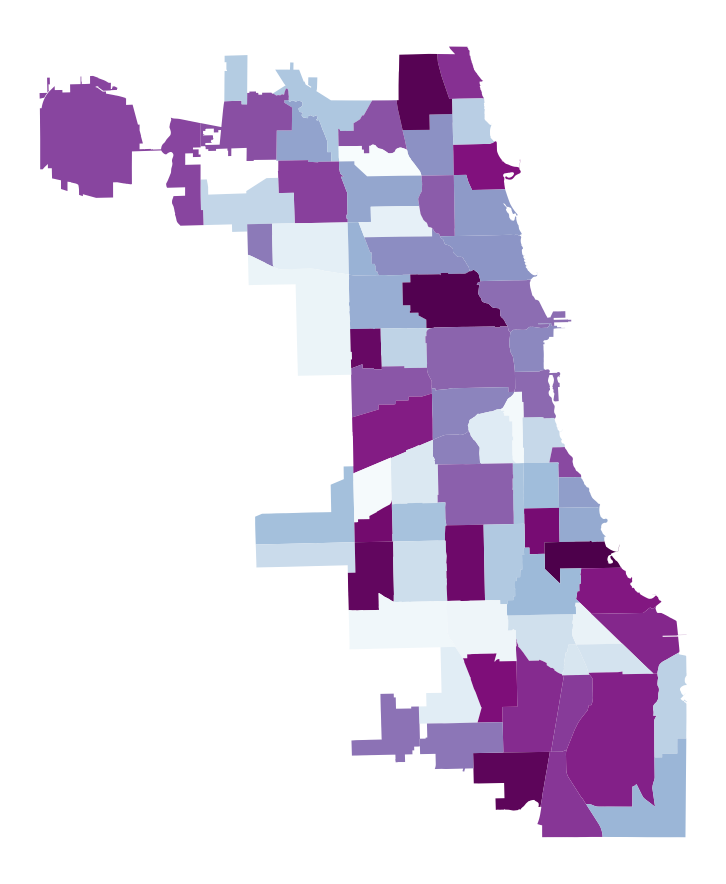

In [468]:
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_axis_off()

cmap = plt.cm.colors.ListedColormap(["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"])

chicago.plot(column="community", cmap="BuPu", ax=ax, legend=False)
legend = ax.get_legend()

# Modify the legend orientation
# legend.set_bbox_to_anchor((1, 0.5))
# legend.set_title()
# plt.savefig("chicago.png", dpi=450)
plt.show()

In [ ]:
chicago = chicago[chicago['community'] != 'LOOP']


In [449]:
chicago[chicago['community']=='WASHINGTON HEIGHTS']


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,Side,group
71,WASHINGTON HEIGHTS,0,79635752.8769,0,73,73,0,0,42222.598163,"MULTIPOLYGON (((-87.63373 41.72885, -87.63369 ...",South,B


In [450]:
chicago[chicago['community']=='LOOP']
import matplotlib.pyplot as plt


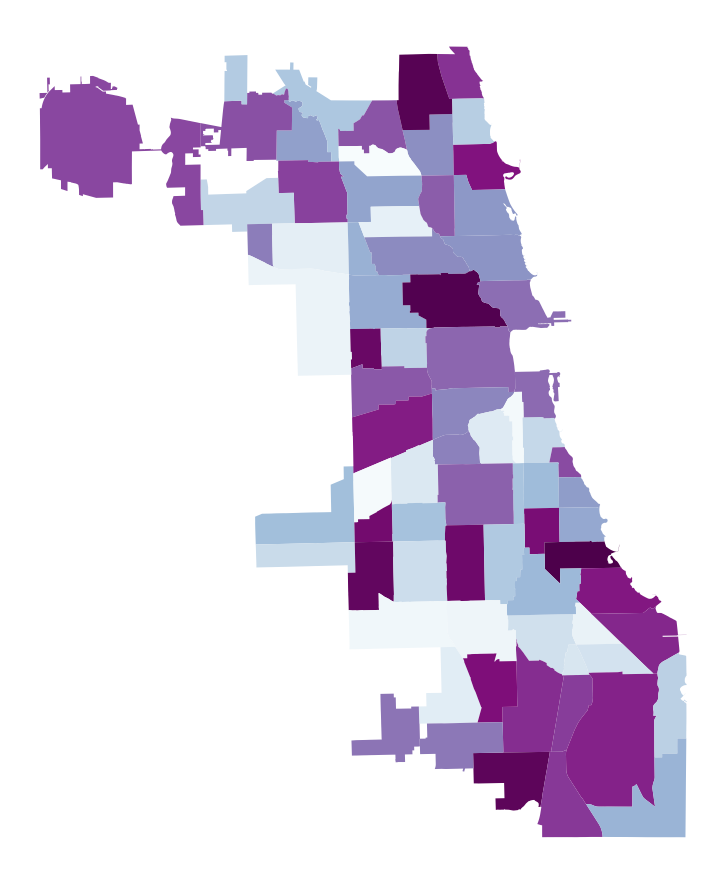

In [462]:
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_axis_off()

cmap = plt.cm.colors.ListedColormap(["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"])

chicago.plot(column="community", cmap="BuPu", ax=ax, legend=False)
legend = ax.get_legend()

# Modify the legend orientation
# legend.set_bbox_to_anchor((1, 0.5))
# legend.set_title()
# plt.savefig("chicago.png", dpi=450)
plt.show()




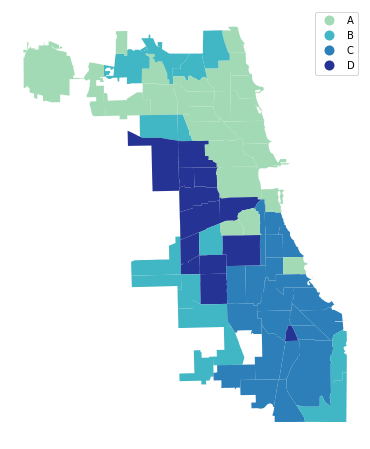

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_axis_off()


chicago.plot(column="group", edgecolor='none',cmap=cmap, ax=ax, legend = True);